## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

#mouse_data_df= pd.merge(study_results, mouse_metadata, how="right", on=["Mouse ID"])
#mouse_data_df.head()

# Merge our two data frames together
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")
combined_mouse_data.head()


# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#find out how if there is duplicates in dataframe and how many of them
duplicate_count=len(combined_mouse_data)-len(combined_mouse_data.drop_duplicates())
duplicate_count



1

In [3]:
# Checking the number of uniqque mice within the dataframe
#using unique() and mouse id to only find the true number of mice

total_mice = pd.unique(combined_mouse_data['Mouse ID'])
len(total_mice)




249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#use the .loc function to determine the total number of duplicates within that df
# Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID":duplicate_mice["Mouse ID"].unique()})

duplicate_mice=combined_mouse_data.loc[combined_mouse_data["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data.loc[combined_mouse_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [53]:
# Checking the number of mice in the clean DataFrame.
mice_total_clean = pd.unique(clean_df['Mouse ID'])
len(mice_total_clean)




248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#....and SEM of the tumor volume for each regimen
# Using clean_df 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

summary_df = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.

summary_regimen_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                   'Standard Deviation': tumor_std, 'SEM': tumor_sem
                                  })

summary_regimen_df






,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_data=summary_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],})
summary_agg_data.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [56]:
#Create a filtered data for drug regimen used and its data points

drug_regimen_data = clean_df['Drug Regimen'].value_counts()
#drug_regimen_data



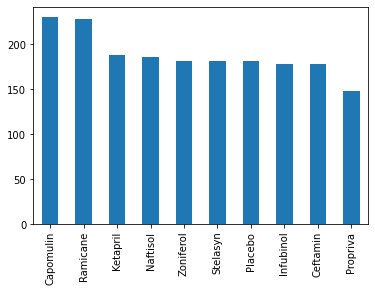

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


drug_regimen_data.plot(kind="bar",figsize=(6,4))
plt.ylabels =("Number of Data Points")
plt.xlabels =("Drug Regimen")
plt.show() 
plt.tight_layout()

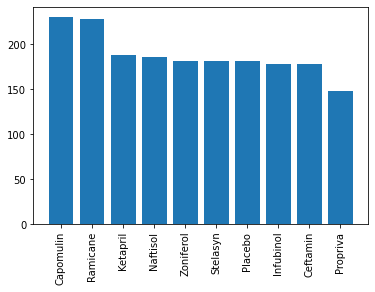

<Figure size 432x288 with 0 Axes>

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(drug_regimen_data.index.values, drug_regimen_data.values)
plt.xticks(rotation="vertical")
plt.ylabels =("Number of Data Points")
plt.xlabels =("Drug Regimen")
plt.show()
plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

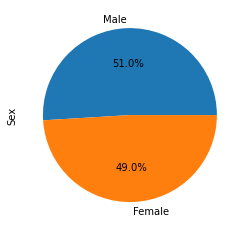

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()

sex_count.plot(kind="pie", autopct="%1.1f%%")
## Labels for the sections of our pie chart




([<matplotlib.patches.Wedge at 0x7fa4c11810a0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

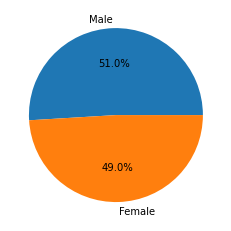

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(sex_count.values, labels=sex_count.index.values,autopct="%1.1f%%")


#plt.title(="Sex")
#plt.title('7D-prior-3MD_sem_sen', pad=32)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
 #****change the values-temperature to colm name tumor volume   
#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
    
    
    
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


#temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
#temperatures = temperature_df['HourlyDryBulbTemperature']

#fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
#ax1.set_ylabel('Temperature (°F)')
#ax1.boxplot(temperatures)
#plt.show()



## Line and Scatter Plots

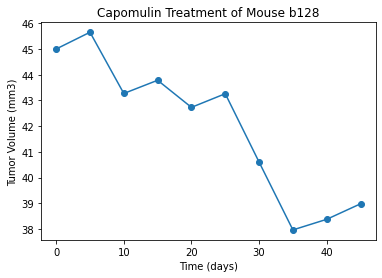

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#select mouse id that is treated with capomulin and used it to plot
#timepoints as the x-axis and tumor volume as the y-axis

mouse_capomulin = clean_df.loc[clean_df['Mouse ID'] == 'b128']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'], marker = 'o')
# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#*****************************
# The maximum x value for our chart will be 100
#x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
 #           s=x_axis, alpha=0.75)


#*****************

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [20]:
#*************
## The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
#income = wdi_data.iloc[:,1]
#alcohol = wdi_data.iloc[:,8]
#correlation = st.pearsonr(income,alcohol)
#print(f"The correlation between both factors is {round(correlation[0],2)}")


# Compare the calcualted Pearson's r to the plots
#plt.scatter(income,alcohol)
#plt.xlabel('Income Per Capita')
#plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.show()



In [21]:
#*********
# Add the linear regression equation and line to plot
#x_values = san_diego_housing['AveRooms']
#y_values = san_diego_housing['MEDV']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Rooms in House')
#plt.ylabel('Median House Prices ($100,000)')
#plt.show()



